 <a id='ReturntoTop'></a>
<header>
  <div style="display:flex; align-items:center;">
    <div style="flex-grow:1;">
      <h1>Oregon Wildlife - Image Classification Capstone</h1>
      <h3>Notebook 4 - Regularization Stategies Adjusted</h3>
      <p>Author: David Lappin | Company: BrainStation | Date: 3/1/2023 - 4/11/2023 </p>
    </div>
    <img src="bannerphoto/bannereagle.jpg" alt="your-image-description" style="height:150px; margin-left:20px; border: 4px solid black;border-radius: 5%;">
  </div>
</header>

------------------------------------------------------------------------------------------------------------------------------

# Introduction and Purpose

For this notebook we will continue to try and improve our model by adding in more complexity and more trainable features. We will add additional filters to our convolution layers and add in additional dense layers. We will then evaluate the model to see if these changes increased our weighted average f1-score and our overall accuracy. 

# Table of Contents

[Packages Import](#1)

[Data Import](#2)

[Prepare Data](#3)

[Implement Data Augmentation](#4)

[Create and Compile New Model](#5)

[Fit and Run Model](#6)

[Preliminary Model Evaluation](#7)

[Import Test Data and Make Predictions](#8)

[Optional Loading of Saved Model](#9)

[Predict on New Data](#10)

[Summary and Next Steps](#11)

 # Packages Import:
 <a id='1'></a>
[Return to Top](#ReturntoTop)

**Matplotlib** - Used as needed for basic visualizations

**Numpy** - Supports large, multi-dimensional arrays and matrices,and contains a large collection of high-level mathematical functions to operate on these arrays.

**Pandas** - Additional data manipulation and analysis

**OS** - interaction with the native OS Python (used for establishing relative path to data files)

**PIL** - Python Imaging Library. Original support for python to deal with images

**glob** - Useful for finding pathname sbased on specific patterns

**sklearn** - machine learning library

**seaborn** - graphing and visualization package

**visualkeras** - allows to visualize CNN model architechture

**Tensorflow** - Machine learning and artificial intelligence with particular focus on training and inference of deep neural networks

**Keras** - Application Program interface (API) built on tensorflow. Used for implementing neural networks (supports backend computation in tensor flow up to 2.3)

     

In [190]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL 
from glob import glob
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import visualkeras


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image

# Import Data:
 <a id='2'></a>
[Return to Top](#ReturntoTop)

In [2]:
#set local path to files for basic exploration

trainpath = 'data/oregon_wildlife/' # This is the relative path to the data
valpath = 'data/oregon_wildlife_validation/' # This is the relative path to the data
testpath = 'data/oregon_wildlife_test/' # This is the relative path to the data

Ensure Data is still in the same state as we left it from the previous EDA before modeling.

In [ ]:
#create and save lists of all file stored in each directory

train_files = os.listdir(trainpath) 
val_files = os.listdir(valpath) 
test_files = os.listdir(testpath) 

In [3]:
#create counts of each class for the training set

totalcount_train = [] #empty list to store counts
class_for_count = [] #empty list to store class names


for file in train_files:
    
    #uses glob to take the length of the list of all files in the sub directory
    count = len(list(glob(f'data/oregon_wildlife/{file}/*')))   
    
    #appends the count to the empty list total count
    totalcount_train.append(count)
    
    #prints the count and the name of the sub-directory
    print(f'{count}: {file}')

#prints the sum total of the list to show the total image count in all sub directories    
print(f'Total images in train directory: {sum(totalcount_train)}')

588: bald_eagle
560: black_bear
535: bobcat
558: canada_lynx
580: columbian_black-tailed_deer
518: cougar
581: coyote
608: deer
505: elk
513: gray_fox
575: gray_wolf
420: mountain_beaver
536: nutria
569: raccoon
495: raven
602: red_fox
426: ringtail
540: seals
570: sea_lions
571: virginia_opossum
Total images: 10850


In [4]:
#create counts of each class for the validation set

totalcount_val = [] #empty list to store counts
class_for_count_val = [] #empty list to store class names

for file in val_files:
    
    #uses glob to take the length of the list of all files in the sub directory
    count = len(list(glob(f'data/oregon_wildlife_validation/{file}/*')))   
    
    #appends the count to the empty list total count
    totalcount_val.append(count)
    
    #prints the count and the name of the sub-directory
    print(f'{count}: {file}')

#prints the sum total of the list to show the total image count in all sub directories    
print(f'Total images in validation directory: {sum(totalcount_val)}')

135: bald_eagle
135: black_bear
135: bobcat
135: canada_lynx
135: columbian_black-tailed_deer
135: cougar
135: coyote
135: deer
135: elk
135: gray_fox
135: gray_wolf
135: mountain_beaver
135: nutria
135: raccoon
135: raven
135: red_fox
135: ringtail
135: seals
135: sea_lions
135: virginia_opossum
Total images: 2700


In [5]:
#create counts of each class for the test set

totalcount_test = [] #empty list to store counts
class_for_count_test = [] #empty list to store class names

for file in test_files:
    
    #uses glob to take the length of the list of all files in the sub directory
    count = len(list(glob(f'data/oregon_wildlife_test/{file}/*')))   
    
    #appends the count to the empty list total count
    totalcount_test.append(count)
    
    #prints the count and the name of the sub-directory
    print(f'{count}: {file}')

#prints the sum total of the list to show the total image count in all sub directories    
print(f'Total images in test directory: {sum(totalcount_test)}')

20: bald_eagle
20: black_bear
20: bobcat
20: canada_lynx
20: columbian_black-tailed_deer
20: cougar
20: coyote
20: deer
20: elk
20: gray_fox
20: gray_wolf
20: mountain_beaver
20: nutria
20: raccoon
20: raven
20: red_fox
20: ringtail
20: seals
20: sea_lions
20: virginia_opossum
Total images: 400


### Observations: 
Everything looks the same.

# Prepare Data:
 <a id='3'></a>
[Return to Top](#ReturntoTop)

Define image loading parameters:

In [6]:
#specify the batch size
batch_size = 32  

#specify the dimensions of the image input
img_height = 180
img_width = 180

For now we are goin to leave the hieght and widgth at 180x180. If we need to reduce the complexity of the photos later for modeling we can reduce these values.

In [7]:
train_set = tf.keras.preprocessing.image_dataset_from_directory(
  trainpath,  #path to files
  label_mode='int',  #encode labels as integers
  seed=7,
  image_size=(img_height, img_width),  #defined by loading parameters
  batch_size=batch_size)


val_set = tf.keras.preprocessing.image_dataset_from_directory(
  valpath,  #path to files
  label_mode='int',  #encode labels as integers
  seed=7,
  image_size=(img_height, img_width),  #defined by loading parameters
  batch_size=batch_size)

Found 10850 files belonging to 20 classes.
Found 2700 files belonging to 20 classes.


**Note** These values match the counts from the directory above. 

In [8]:
#save and check class_names in the training set

class_names = train_set.class_names
len(class_names)


20

Below:
- **Autotune** allows for CPU performance optimizaiton
- **Cache** - stores imported images in memory for future epoch iterations
- **prefetch** - allows for overlapping of preprocess and training

In [11]:
#adjust the prefetching for performance

AUTOTUNE = tf.data.AUTOTUNE #Autotune optimizes CPU uptime for each batch

train_set = train_set.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE) #cache stores data in memory after 1st epoch for faster iterations
val_set = val_set.cache().prefetch(buffer_size=AUTOTUNE) #prefetch allows for overlapping 


# Implement Data Augmentation     
<a id='4'></a>
[Return to Top](#ReturntoTop)

Again, we are going to implement data augmentation as a means of regularization. Additionally, the added noise should alleviate the potential data leakage problem. We will define our data augmentation process below.


##### SOURCE:
https://www.tensorflow.org/tutorials/images/classification#data_augmentation

In [10]:
# creates an augmentation sequence that can be used on a single example to create new variations

#use sequential to define multiple layers in sequence for data augmentation process
data_augmentation = keras.Sequential(
  [
    #define the input parameters for the image dimensions and complete a random horizontal flip of the image
    layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
      
    # Randomly rotate the image by 10% (10% of 180 degrees = 18 degrees per rotation)  
    layers.RandomRotation(0.1),
      
    #randomly zoom by 10%  
    layers.RandomZoom(0.1),
  ]
)

In [ ]:
#run below if you want to look at some images like in Notebook 3

#generate plot and specify size
plt.figure(figsize=(10, 10))

#take an image from the training set
for images, _ in train_set.take(1):
    
  #repeat for 3 augmentations
  for i in range(3):
    
    #implement the data augmentation on the selected images (1)
    augmented_images = data_augmentation(images)
    
    #add each image to subplot
    ax = plt.subplot(1, 3, i + 1)
    
    #plot the image, note unit8 converts the numpy array onto a scale 0-255 which allows imshow to regenerate the
        #image representation
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    
    #remove axis (dont need to see dimensions)
    plt.axis("off")


# Create and Compile New Model
 <a id='5'></a>
[Return to Top](#ReturntoTop)


We can now move on to building the model which will include the data augmentation and a bit more complexity in the form of additional dense layers, batch normalization between convolution blocks, and drop out between dense layers. **For a full explaination of the purpose of each of these elements please refer to notebook '3.0_Regularization_Strategies'.** 

In comparison to our previous model, we will use 64 filters (instead of 32) in each of our convolution blocks to attempt to capture more features in the data. This should allow the model to begin to recognize more complicated patterns in the data and result in a better performance. It is expected that by doubling this value, it will significantly increase the training time. 

We are also going to add a few more dense layers. The dense layers will allow the model to learn more abstract representations and help to make more informed predictions on new data. We will include drop out layers to minimze the risk of overfitting by adding in the addition al dense layers.

In [88]:
#redefine the input values for the data to 180x180 for the rescaling layer
num_classes = len(class_names)
img_height = 180
img_width = 180


#define model sequential
Batchnorm_model = Sequential([
  
  #include rescaling layer directly in model build   
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    
  #include data augmentation (note we do not need to use layers. because the layers are defined and stored 
    #in the data_augmentation variable)  
  data_augmentation,  
   
   '''    
  Include the convolution blocks with max pooling layers, and 'relu' activation. 
  Padding ensures the output feature map has the same dimensions as the input feature map. 
  Include batch normalization in each of the convolutions to improve on the stability and 
  performance of the model   
  '''  
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),  
  layers.MaxPooling2D(),
  
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  
    
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),

  #Flatten  
  layers.Flatten(),
    
  #Dense Layers 
  #include a drop out layer with 20% drop out 
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.2),  
    
  layers.Dense(64, activation='relu'),
  layers.Dropout(0.2),   
    
  layers.Dense(32, activation='relu'),
  layers.Dropout(0.2),  
    
  #output layer with softmax activation and the out put defined by the number of classes (20)     
  layers.Dense(num_classes, activation = 'softmax')
])


Compile the model using:
- Adam Optimzer (high performing gradient decent method, default learning rate = 0.001)
 - note there are other options but we will stick with Adam
- SparseCategoricalCrossentropy loss calcualtion  (used when there are more than two classes or labels)

In [89]:
#compile the model

Reg_model.compile(optimizer='adam',
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])

In [90]:
#look at the compiled model summary 

Reg_model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_23 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_75 (Conv2D)          (None, 180, 180, 64)      1792      
                                                                 
 batch_normalization_75 (Bat  (None, 180, 180, 64)     256       
 chNormalization)                                                
                                                                 
 max_pooling2d_75 (MaxPoolin  (None, 90, 90, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_76 (Conv2D)          (None, 90, 90, 64)      

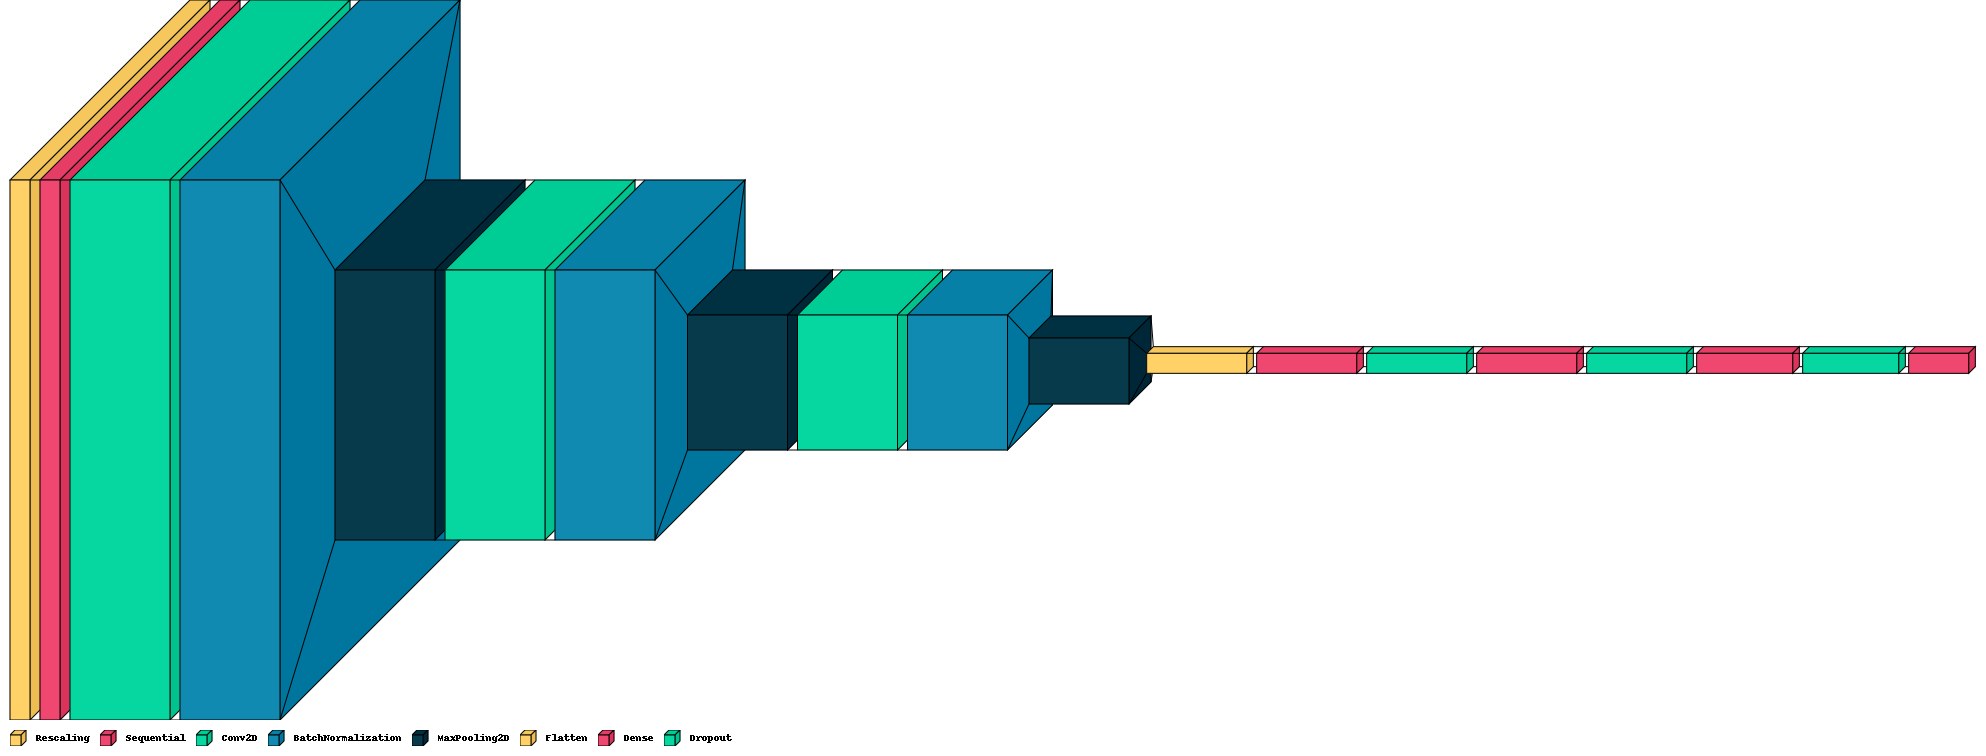

In [91]:
#visualize the model summary with VisualKeras

visualkeras.layered_view(Reg_model, legend = True, draw_volume = True, scale_xy=3, scale_z=3, max_z=100, \
                         to_file = 'modelvisualizations/Reg_model.png')


# Fit and Run
 <a id='6'></a>
[Return to Top](#ReturntoTop)

In our new model we have now compiled all the layers. There are ~4million trainable parameters, and we see our output layer is 20 which matches our class labels. This is double the amount of trainable features as the previous model. We will determine if the added complexity boosts our models performance in its evaluation.

Next we can fit our model to the training data using 75 epochs or until early stopped as defined by the callback below. Our model will be validated on the validation split. The test set will be saved for predictions later. 

In [92]:
# set stopping criteria

callbacks = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.07, patience=3)

**NOTE** As mentioned in previous notebook, we reduced the patience from `5` to `3` in order stop the model more effectively prior to overfitting.

In [93]:
#fit model for 75 epochs

epochs = 75

#save history  and fit the model to the train set and validate on the val set, use call backs as defined above
history = Reg_model.fit(   
  train_set,            
  validation_data=val_set, 
  epochs=epochs,
  callbacks = [callbacks]
)

Epoch 1/75
340/340 [==============================] - 421s 1s/step - loss: 3.2298 - accuracy: 0.0560 - val_loss: 2.9979 - val_accuracy: 0.0559
Epoch 2/75
340/340 [==============================] - 395s 1s/step - loss: 2.9559 - accuracy: 0.0725 - val_loss: 2.9476 - val_accuracy: 0.0696
Epoch 3/75
340/340 [==============================] - 395s 1s/step - loss: 2.8978 - accuracy: 0.0972 - val_loss: 2.9736 - val_accuracy: 0.0774
Epoch 4/75
340/340 [==============================] - 401s 1s/step - loss: 2.8645 - accuracy: 0.1071 - val_loss: 2.8101 - val_accuracy: 0.1289
Epoch 5/75
340/340 [==============================] - 396s 1s/step - loss: 2.8151 - accuracy: 0.1169 - val_loss: 2.7642 - val_accuracy: 0.1404
Epoch 6/75
340/340 [==============================] - 393s 1s/step - loss: 2.7610 - accuracy: 0.1233 - val_loss: 2.7904 - val_accuracy: 0.1104
Epoch 7/75
340/340 [==============================] - 397s 1s/step - loss: 2.7098 - accuracy: 0.1396 - val_loss: 2.6973 - val_accuracy: 0.1426

340/340 [==============================] - 400s 1s/step - loss: 1.4830 - accuracy: 0.5278 - val_loss: 1.8867 - val_accuracy: 0.4493
Epoch 42/75
340/340 [==============================] - 399s 1s/step - loss: 1.4651 - accuracy: 0.5337 - val_loss: 1.7116 - val_accuracy: 0.4885


#### Observations:

The model stopped (early stopping) at 42/75 epochs. We can now save the model for future loading and begin to visualize and evaluate our baseline model:

Save the model: (note this code is only needed if you plan to save the model weights after running)

In [95]:
#save the model weights for use in predictions later if desired

Reg_model.save('models/Reg_model.h5')

# Preliminary Evaluation
 <a id='7'></a>
[Return to Top](#ReturntoTop)

We can visualize the model perfmormance.

##### SOURCE - plot code base from TF Guide:
https://www.tensorflow.org/tutorials/images/classification

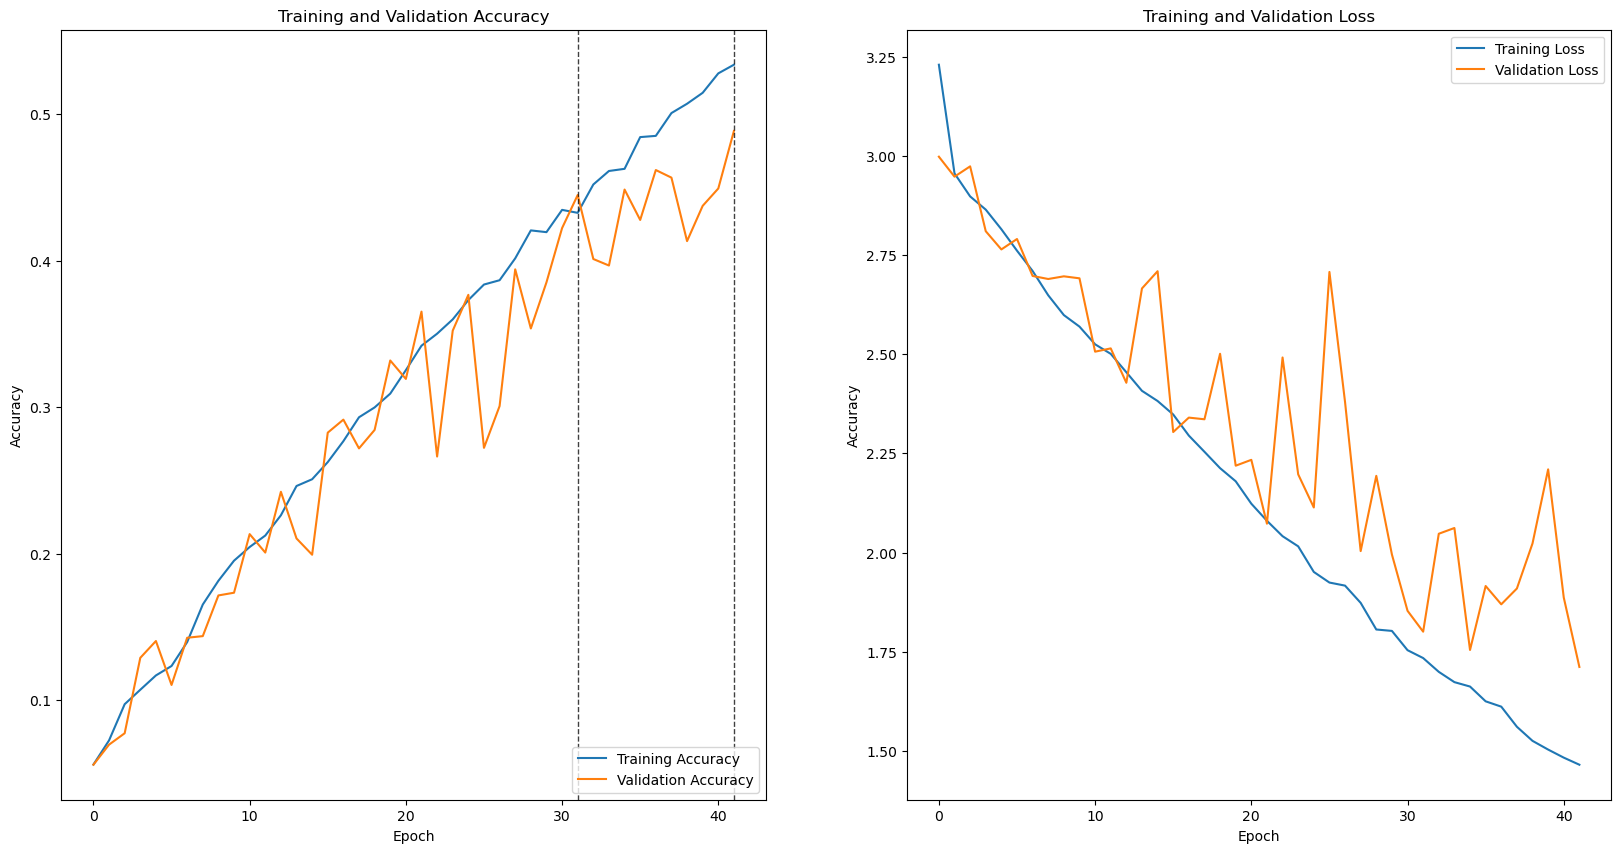

In [135]:
#visualize model performance after 30 

#pull out the accuracy and validation accuracies from model fit history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

#pull out the loss data from the model fit history
loss = history.history['loss']
val_loss = history.history['val_loss']

#x lab range defined by the # of epochs ran
epochs_range = range(len(acc))

#training vs Validation Accuracies
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#optional vertical and horizontal lines to define optimal epoch ranges
plt.axvline(31, color = "black", linestyle = '--', linewidth = 1, alpha = 0.75)
plt.axvline(41, color = "black", linestyle = '--', linewidth = 1, alpha = 0.75)
#plt.axhline(0.39, color = "black", linestyle = '-', linewidth = 1, alpha = 0.75, label = 'Optimal Epochs (30)')



#------------------------------------------------------


#visualize loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Observations:

The training accuracy achieved roughly 55% and the validation accuracy achieved roughly a 48% accuracy before our early stopping stopped the training. This is nearly a 10% validation accuarcy increase from our previous models optimal training (before overfitting). 

As noted by the vertical lines, there are two potential optimal epoch numbers for this model. One at 31 epochs and one at 42 epochs (the very end of training). The earlier epoch is very well fit and the validation accuarcy (44%) actually out performs the training accuracy (43%) at this point. The other option achieves a higher validation accuracy (48%) and a higher training accuracy (53%), however, it could be argued that the model is beginning to overfit at this point. In either case, this marks a 4-8% increase in validation accuracy compared to the previous model in half the number of epochs.  


At first glance, our added complexity seems to have resulted in a better performance. Lets import our test data to make predictions and further evaluate:

# Import Test Data and Make Predictions
 <a id='8'></a>
[Return to Top](#ReturntoTop)

In [114]:
#import test set directory for predictions

test_set = tf.keras.preprocessing.image_dataset_from_directory(
  testpath,
  image_size=(img_height, img_width),
  label_mode = 'categorical') #since these are not for training we can load as categorical rather than integer

Found 400 files belonging to 20 classes.


#### SOURCE

Found way to extract multiple predictions across whole dataset from answer by (Frightera, 2021)
https://stackoverflow.com/questions/68121629/trying-to-extract-y-val-from-dataset-throws-all-the-input-arrays-must-have-same

In [115]:
#generate predictions on test data

predictions = np.array([]) #empty list for predictions
labels =  np.array([]) #empty list for labels

#loop through batch of data and their corresponding labels
for x, y in test_set:
  
  #generate predictions by taking the max value (highest probability) prediction from the model 
  predictions = np.concatenate([predictions, np.argmax(Reg_model.predict(x), axis = -1)]) 

  #generate true labels from the tensor form to numpy array and extract the true class index with argmax
  labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

1/1 [==============================] - 0s 117ms/step


In [116]:
# generate a tensorflow confusion matrix from the predictions and true labels above

con_mat = tf.math.confusion_matrix(labels=labels, predictions=predictions).numpy()

In [117]:
#normalize the values such that they fit on a 0-1 scale
normalized_conf_mat = con_mat / con_mat.sum(axis=1)

In [118]:
#define the class names and create temp dataframe to that we can plot using the class names (instead of integers)

class_names = test_set.class_names
con_mat_df = pd.DataFrame(normalized_conf_mat, index=class_names, columns=class_names)

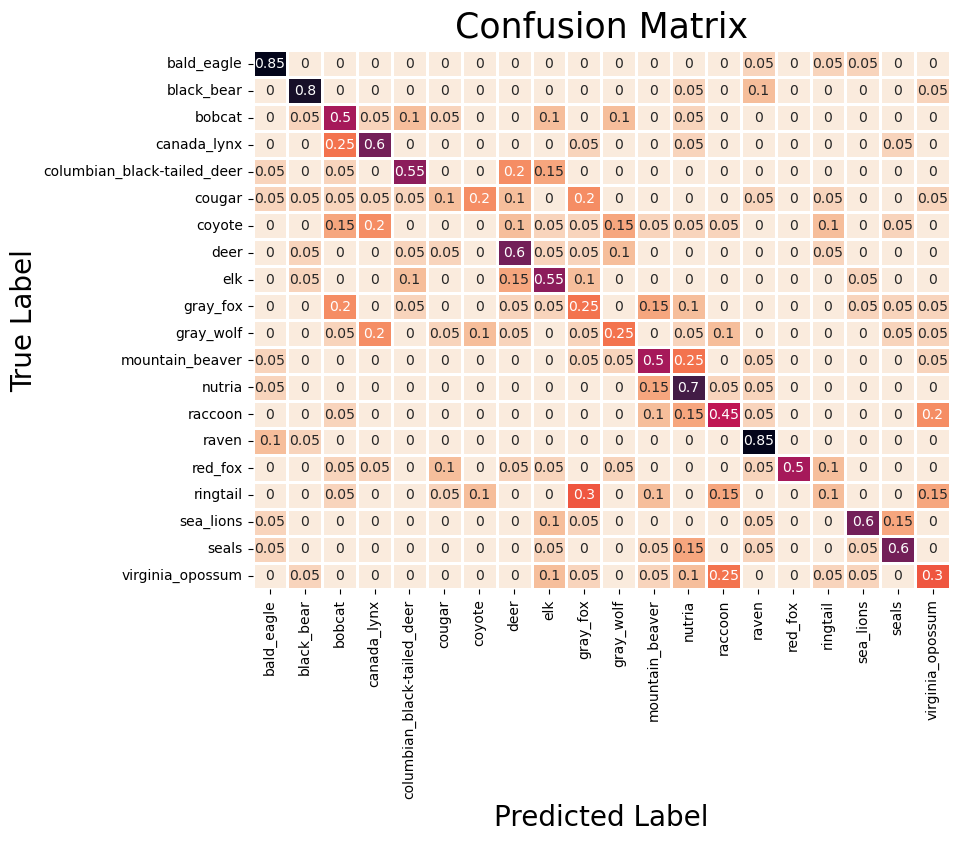

In [119]:
#plot confusion matrix using the data frame with class names created above
plt.figure(figsize = (9,7))
sns.heatmap(con_mat_df,
            annot=True,
            cbar=False,
            cmap="rocket_r",
            linewidths=1
           )
plt.title('Confusion Matrix',size = 25,y=1.01)
plt.xlabel("Predicted Label", size = 20)
plt.ylabel("True Label", size = 20)
plt.show()

### Observations
While there are some pernounced areas where our model is struggling, it looks like the model is predicting much more accurately accross all classes. Again, the unique animals such as bears and eagles are being predicted well, but we are also seeing some of the other species (which share similar features with one and other) starting to predict better.

To continue with the example from notebook 3, the nutria and the mountain beaver seem to be balancing out more. The nutria is predicting slightly lower then previously, but the mountain beaver has increased its recall value from 0.2 to 0.5 in our new model. It is possible that the added complexity in both the convolution blocks and the dense layers has allowed the model to extract more unique features perclass and then generalize better accross the validation set. To be sure of this we will have to also look at the precision values and the f1-scores in the classification model.

Interestly, the model was not able to correctly predict a single coyote. Since the coyote shares such similar features with multiple other classes (foxes, wolves, gray wolf, bobcats) it is possible that all the model simply did not 'learn' what a coyote was supposed to be. It is suprising that it was not able to predict a single one though.

Lets next look at out classification report so that we can look at our precision and f1-scores as well:

In [120]:
#generate classification report from predictions

target_names = test_set.class_names
print(classification_report(labels, predictions, target_names = target_names))

                             precision    recall  f1-score   support

                 bald_eagle       0.68      0.85      0.76        20
                 black_bear       0.73      0.80      0.76        20
                     bobcat       0.36      0.50      0.42        20
                canada_lynx       0.52      0.60      0.56        20
columbian_black-tailed_deer       0.61      0.55      0.58        20
                     cougar       0.25      0.10      0.14        20
                     coyote       0.00      0.00      0.00        20
                       deer       0.46      0.60      0.52        20
                        elk       0.44      0.55      0.49        20
                   gray_fox       0.21      0.25      0.23        20
                  gray_wolf       0.36      0.25      0.29        20
            mountain_beaver       0.43      0.50      0.47        20
                     nutria       0.41      0.70      0.52        20
                    raccoon      

To sort and look closer at the data we can translate the above information into a pandas dataframe so we can sort/agg/visualize the data easier if desired.

##### SOURCE - classification report to pandas df:

https://stackoverflow.com/questions/39662398/scikit-learn-output-metrics-classification-report-into-csv-tab-delimited-format

In [121]:
#translate the classification report into pd df

classification_report_report = classification_report(labels, predictions, target_names = target_names, output_dict = True)
classification_report_df = pd.DataFrame(classification_report_report).transpose()
classification_report_df

,precision,recall,f1-score,support
bald_eagle,0.680000,0.8500,0.755556,20.0000
black_bear,0.727273,0.8000,0.761905,20.0000
bobcat,0.357143,0.5000,0.416667,20.0000
canada_lynx,0.521739,0.6000,0.558140,20.0000
columbian_black-tailed_deer,0.611111,0.5500,0.578947,20.0000
cougar,0.250000,0.1000,0.142857,20.0000
coyote,0.000000,0.0000,0.000000,20.0000
deer,0.461538,0.6000,0.521739,20.0000
elk,0.440000,0.5500,0.488889,20.0000
gray_fox,0.208333,0.2500,0.227273,20.0000


### Observations
In our new model, the Nutria and the Mountain beaver share much closer precision and f1-scores (nutria had double the f1-score in the previous model). So for at least these two classes, the new model was able to generalize across the two classes better. As a whole, the weighted average f1-score was 0.46 compared to the previous models 0.40. So, as we alluded to in the confusion matrix, the models generalization accross all classes seems to have improved. Outside of our coyote class, it looks like we were able to generally improve our model from the previous version. Very Cool!

In [122]:
#best f1 scores

classification_report_df.sort_values('f1-score', ascending = False).head(5)

,precision,recall,f1-score,support
black_bear,0.727273,0.80,0.761905,20.0
bald_eagle,0.680000,0.85,0.755556,20.0
raven,0.629630,0.85,0.723404,20.0
red_fox,1.000000,0.50,0.666667,20.0
sea_lions,0.705882,0.60,0.648649,20.0


In [123]:
#worst f1 scores

classification_report_df.sort_values('f1-score', ascending = False).tail(5)

,precision,recall,f1-score,support
gray_wolf,0.357143,0.25,0.294118,20.0
gray_fox,0.208333,0.25,0.227273,20.0
cougar,0.250000,0.10,0.142857,20.0
ringtail,0.200000,0.10,0.133333,20.0
coyote,0.000000,0.00,0.000000,20.0


### Observations
Looking at our bottom 5 classes (by f1-score), it becomes even more clear that the model is infact struggling with classes with similar features to coyotes. These classes are all so similar looking that it is becoming very difficult for our model to predict them accurately. We can look at some photos of these classes below to see where things are going wrong, and where things are going well.

# Optional Load for Future Model Predictions:
 <a id='9'></a>
[Return to Top](#ReturntoTop)


If desired in the future, the code below can be used as an example for loading the model to predict on new data or to continue training. The '.h5' file extension saves the model construction, the trained weights, and time information from `compile()`.

##### SOURCE
https://www.tensorflow.org/guide/keras/save_and_serialize

In [124]:
#optional code to re-load and predict on new data

load_model = keras.models.load_model("models/Reg_model.h5") 


# Test on New Data:
 <a id='10'></a>
[Return to Top](#ReturntoTop)


Lets re-define our prediction model from the previous notebook:

In [182]:
def predict_class(img_path, model):
    
    """
    This function will take in a defined image path as well as the name of the loaded model and then 
    it will show that image, predict on it, and print the prediction
    """
    
    # Define the image size expected by the model
    img_height, img_width = model.input_shape[1:3]

    # Load the image
    img = image.load_img(img_path, target_size=(img_height, img_width))

    # Show the image
    plt.imshow(img)
    plt.show()

    # Convert the image to an array and create a batch
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    # Make a prediction on the image
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    #create a list of all class names
    class_names = ['bald_eagle', 'black_bear', 'bobcat', 'canada_lynx', 'columbian_black-tailed_deer', 'cougar', 
                   'coyote', 'deer', 'elk', 'gray_fox', 'gray_wolf', 'mountain_beaver', 'nutria', 'raccoon', 'raven', 
                   'red_fox', 'ringtail', 'sea_lions', 'seals', 'virginia_opossum']
    
    # Get the predicted class label and confidence
    pred_class = class_names[np.argmax(score)]
    confidence = 100 * np.max(score)

    # Print the predicted class label and confidence
    print("This image most likely belongs to {} with a {:.2f}% confidence."
          .format(pred_class, confidence))

Now load the saved model:

In [183]:
#load the model

load_model = keras.models.load_model('models/Reg_model.h5')


Lets take a look and see how the model predicts the same 4 pictures of nutria nad mountain beavers from the previous notebook. As a reminder, the previous model predicted all 4 to be nutria.

In [197]:
#Set some image paths 

nutria1 = "data/oregon_wildlife_test/nutria/2ea9111a53dc829571.jpg"
nutria2 = 'data/oregon_wildlife_test/nutria/007cb65238a6619733.jpg'
beaver1 = "data/oregon_wildlife_test/mountain_beaver/3105f534854eed81cc.jpg"
beaver2 = "data/oregon_wildlife_test/mountain_beaver/18d9ebdbd37c0d11ed.jpg"

In [198]:
#create a list of the image path variables defined above
function_test_list = [nutria1, nutria2, beaver1, beaver2]

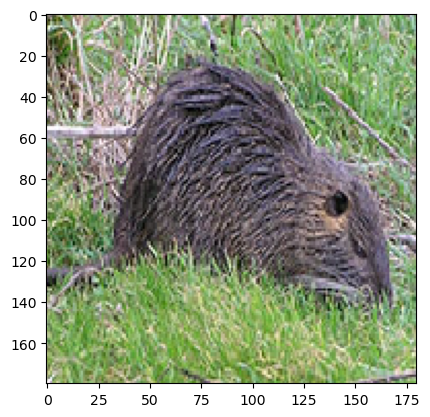

1/1 [==============================] - 0s 24ms/step
This image most likely belongs to nutria with a 11.44% confidence.


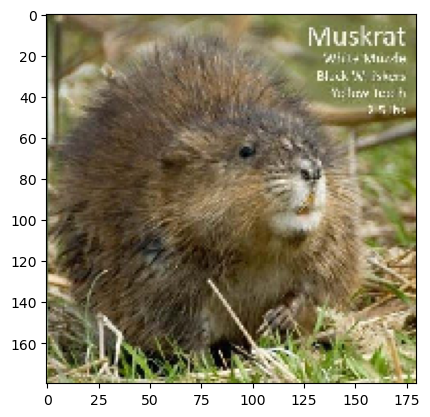

1/1 [==============================] - 0s 26ms/step
This image most likely belongs to mountain_beaver with a 9.17% confidence.


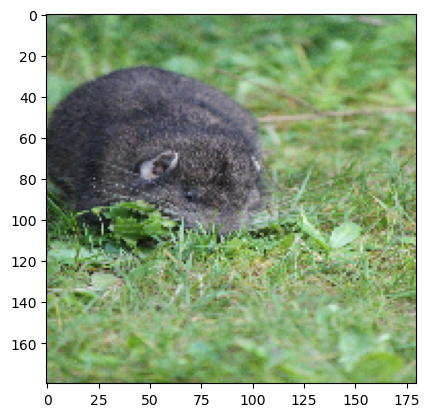

1/1 [==============================] - 0s 25ms/step
This image most likely belongs to nutria with a 11.93% confidence.


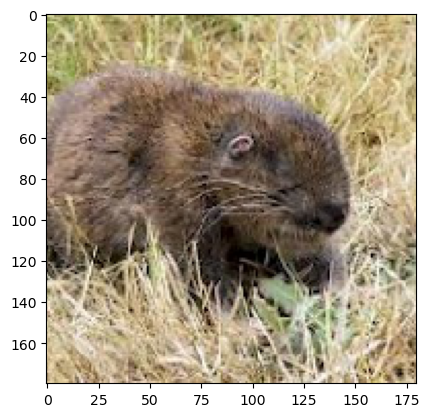

1/1 [==============================] - 0s 27ms/step
This image most likely belongs to mountain_beaver with a 10.05% confidence.


In [199]:
#loop through each variable in the list
for x in function_test_list:
    
    #use function to show image and prediction
    predict_class(x, load_model)

### Observations:
The model successfully predicted 2/4 this time! This is still a very challenging task, but it shows our model is not predicting both nutria and mountain beavers as nutria anymore. 

How about we look at a few photos of coyote that were sent to me by a friend. Based on the model metrics, we would expect some of the predictions to be gray fox, gray wolf, bobcat. Lets see what we get.

In [222]:
#Set some image paths 

coy1 = "randphotos/coyote/coyote2.jpg"
coy2 = "randphotos/coyote/coyote3.jpg"

In [225]:
#create a list of the image path variables defined above
function_test_list = [coy1, coy2]

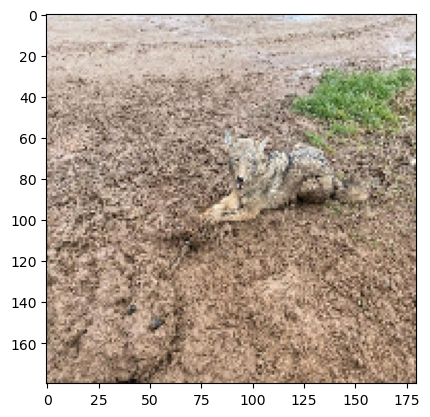

1/1 [==============================] - 0s 25ms/step
This image most likely belongs to bobcat with a 5.58% confidence.


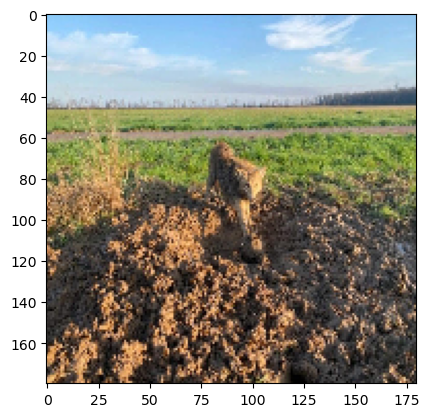

1/1 [==============================] - 0s 24ms/step
This image most likely belongs to nutria with a 11.88% confidence.


In [226]:
#loop through each variable in the list
for x in function_test_list:
    
    #use function to show image and prediction
    predict_class(x, load_model)

# Observations:

So one is predicted as a bobcat which we stated before shares many simliarities, and the other is none other than a Nutria! Lets look at a few classes that performed well with some more photos from friends:

In [249]:
#Set some image paths 

pic1 = "randphotos/eagle/mleagle1.jpg"
pic2 = "randphotos/bear/albear1.JPG"
pic3 = "randphotos/seal/alseal3.JPEG"

In [250]:
#create a list of the image path variables defined above
function_test_list = [pic1, pic2, pic3]

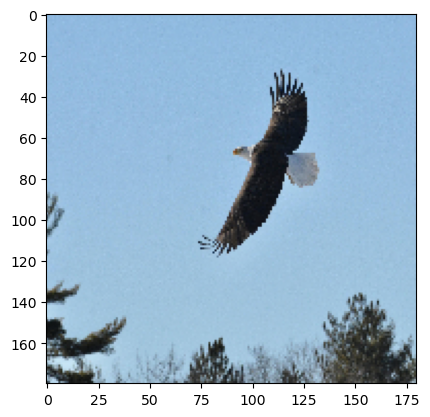

1/1 [==============================] - 0s 25ms/step
This image most likely belongs to bald_eagle with a 11.64% confidence.


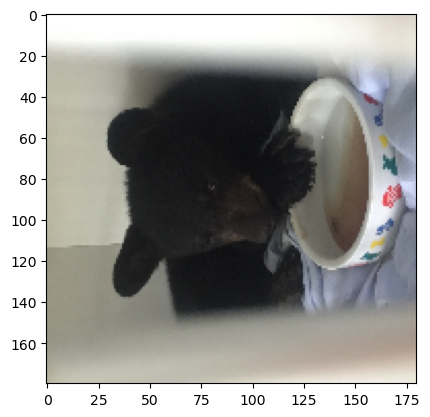

1/1 [==============================] - 0s 23ms/step
This image most likely belongs to raven with a 10.87% confidence.


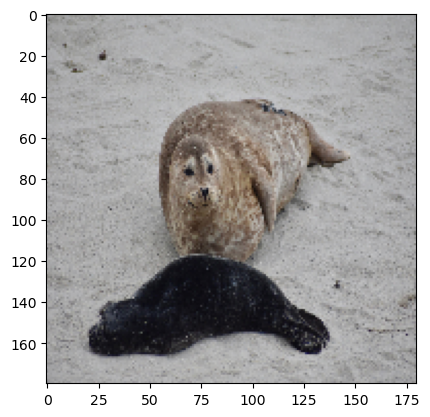

1/1 [==============================] - 0s 25ms/step
This image most likely belongs to seals with a 8.33% confidence.


In [251]:
#loop through each variable in the list
for x in function_test_list:
    
    #use function to show image and prediction
    predict_class(x, load_model)

# Observations:
Not bad, it was able to get 2/3! Interestingly it chose raven for the bear picture which may be a result of the color similarities between the species.

# Summary and Next Steps:
<a id='11'></a>
[Return to Top](#ReturntoTop)

**For our new updated model we completed these tasks and determined the following:**
- Doubled the number of filters in our convolution from 32 to 64
- Added additional dense layers with drop out layers to increase some complexity in the model
- Evaluated the models performance and determined the following:
    - The over-all accuracy and weighted f1-score increased from our prior version by roughly 4-8% depending on the optimal epoch selected
    - The precision and recall were are beginningto balance better between classes (Continuation of the example with Nutria and Mountain Beavers)
- Predicted on some test data and some unseen data as well any found that the model is showing some improvement but still struggling in other areas (the coyotes)

**Next Steps**

- We could continue to increase the complexity of the model and make adjustments, but every time we do this we are increasing the computational power required to complete the training. We were able to show some improvement from our previous model, and some considerable improvement from our baseline.

- For our next step we will use Transfer learning to import the weights of a pretrained model and then fine tune that model to work with our data set.

### Next steps are located in the Fifth Notebook - '5.0_Transfer_Learning_MobileNetV2'

------------------------------------------------------------------------------------------------------------------------------